In [ ]:
#!/usr/bin/env python
# coding: utf-8

# Standard library imports
import sys
import warnings
from typing import Dict, List, Optional, Tuple, Union
from itertools import product

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scientific computing
from scipy import stats
from scipy.stats import uniform, randint


# Machine Learning
from sklearn import __version__ as sklearn_version
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedKFold,
    cross_val_score,
    cross_validate
)
import pickle
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Times",
    "font.size" : 10,
})

# Custom libs
try:
    from envcity_plot_lib import *
    ENVCITY_AVAILABLE = True
except ImportError:
    warnings.warn("envcity_plot_lib not available")
    ENVCITY_AVAILABLE = False

try:
    from alphasense_b_sensors.alphasense_sensors import *
    ALPHASENSE_AVAILABLE = True
except ImportError:
    warnings.warn("alphasense_b_sensors not available")
    ALPHASENSE_AVAILABLE = False

# Configuration
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Times",
    "font.size": 10,
    "figure.figsize": (10, 6),
    "axes.grid": True,
    "grid.alpha": 0.3
})

In [ ]:

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)

def print_versions() -> None:
    """Print versions of key libraries."""
    print("="*50)
    print("LIBRARY VERSIONS")
    print("="*50)
    print(f"Python: {sys.version.split()[0]}")
    print(f"NumPy: {np.__version__}")
    print(f"Pandas: {pd.__version__}")
    print(f"Matplotlib: {plt.matplotlib.__version__}")
    print(f"Seaborn: {sns.__version__}")
    print(f"Scikit-learn: {sklearn_version}")
    print("="*50)

print_versions()

def exploratory_analysis(dict_data_e1, dict_data_e2, labels, latex_labels, start, end):

    table_exploratory_analysis = {}

    for idx, l in enumerate(labels):

        e1 = dict_data_e1[l]
        e2 = dict_data_e2[l]

        concatenated = pd.concat([e1, e2], axis=1, keys=['Station 1', 'Station 2'])
        table_exploratory_analysis[l] = describe(concatenated, ['median'], ['25%', '50%', '75%'])

    return table_exploratory_analysis

class dataLoader:
    def __init__(self):
        pass

LIBRARY VERSIONS
Python: 3.11.13
NumPy: 2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
Seaborn: 0.13.2
Scikit-learn: 1.6.1


In [ ]:

#lendo dados e mais
aqm = pd.read_csv('envcity_df_sp_dataset_2023.csv')

aqm.set_index('time', inplace=True)
aqm.index = pd.to_datetime(aqm.index)

labels =  ['co_we', 'co_ae', "temp"]
preffix = ['e2sp_']
label_ref= 'iag_co'

df = aqm

df = aqm[[preffix[0] + labels[0], preffix[0] + labels[1], 'pin_umid', label_ref, preffix[0] + "temp"]]

df.index = pd.to_datetime(df.index)
df = df.resample('5min').mean()
df = df.interpolate(method = 'linear', limit=1, limit_area = "inside")
df = df.dropna()

print(df.shape)



(9597, 5)


In [ ]:
#ALPHASENSE E BLA BLA
co = Alphasense_Sensors("CO-B4", "162741354")
no2 = Alphasense_Sensors("NO2-B43F", "202742056")
so2 = Alphasense_Sensors("SO2-B4", "164240348")
ox = Alphasense_Sensors("OX-B431", "204240461")

# to mV
we = df[preffix[0] + labels[0]]*1000
ae = df[preffix[0] + labels[1]]*1000
# temp = df[preffix[0] + 'temp']


ppb = ((we - co.electronic_we) - (ae - co.electronic_ae))/co.sensitivity

df[preffix[0] + 'co'] = ppb / 1000


#%%

print(df.describe())
#%%

        e2sp_co_we   e2sp_co_ae     pin_umid       iag_co     e2sp_temp  \
count  9597.000000  9597.000000  9597.000000  9597.000000  9.597000e+03   
mean      0.479835     0.279989    75.604981     1.797280  1.002118e+01   
std       0.159594     0.060115    17.022597     0.345834  1.109849e+01   
min       0.217398     0.157875    26.000000     1.142200  0.000000e+00   
25%       0.379200     0.271204    67.000000     1.551600  5.693801e-39   
50%       0.427750     0.279750    82.000000     1.712000  9.100000e+00   
75%       0.525141     0.290927    88.000000     1.921600  1.720000e+01   
max       3.000000     4.000000    96.000000     3.205600  3.890000e+01   

           e2sp_co  
count  9597.000000  
mean      0.453055  
std       0.385694  
min      -2.487745  
25%       0.203585  
50%       0.329044  
75%       0.568771  
max       4.327692  


In [ ]:
Yco = df[label_ref]

Xco = df.loc[Yco.index][[preffix[0] + 'co', preffix[0] + 'co_we',preffix[0] + 'co_ae', preffix[0] + 'temp', 'pin_umid']]
Xco

,e2sp_co,e2sp_co_we,e2sp_co_ae,e2sp_temp,pin_umid
time,,,,,
2023-03-16 21:15:00,-0.061581,0.517687,0.527812,0.000000,75.0
2023-03-16 21:20:00,-0.061581,0.517687,0.527812,0.000000,75.0
2023-03-16 21:25:00,-0.033252,0.533624,0.532191,0.000000,75.0
2023-03-19 15:25:00,-2.487745,3.000000,4.000000,1.961868,83.0
2023-03-19 15:30:00,-2.470937,2.984219,3.977361,0.980934,83.0
...,...,...,...,...,...
2023-06-23 11:30:00,0.305487,0.373667,0.234028,26.800000,47.0
2023-06-23 11:35:00,0.280129,0.367782,0.238490,27.500000,47.0
2023-06-23 11:40:00,0.294060,0.369998,0.235022,27.033333,47.0


In [ ]:
Yco

,iag_co
time,
2023-03-16 21:15:00,1.3962
2023-03-16 21:20:00,1.4102
2023-03-16 21:25:00,1.4240
2023-03-19 15:25:00,1.3470
2023-03-19 15:30:00,1.3458
...,...
2023-06-23 11:30:00,1.9312
2023-06-23 11:35:00,1.8236
2023-06-23 11:40:00,1.8142


In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(Xco, Yco, train_size=0.6)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)


In [ ]:
kfold = RepeatedKFold(n_splits = 5, n_repeats = 1)
# kfold = StratifiedKFold(n_splits = 5)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(4318, 5)
(1440, 5)
(3839, 5)


In [ ]:
#GERA PIPELINE
param_grid = {"randomforestregressor__n_estimators": np.array([32, 64, 124]),
              "randomforestregressor__max_depth": [None, 32],
              "randomforestregressor__bootstrap" : [False, True],
              'randomforestregressor__max_features': ["sqrt", None],
              'randomforestregressor__criterion': ['squared_error' ]}# 'absolute_error', 'friedman_mse']}

regressor = make_pipeline(RandomForestRegressor())




In [ ]:
#faz o gridSearch
gs = GridSearchCV(regressor, param_grid=param_grid, n_jobs=-1, verbose = 3,\
                  return_train_score=True, cv = kfold, error_score = 'raise')


res = gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
#exporta o modelo após GridSearch
with open('modeloRF_Regressor.pickle', 'wb') as f:
    pickle.dump(gs.best_estimator_, f)


In [ ]:
# %% Resultado da otimização
print(train_data := pd.DataFrame(res.cv_results_))

with open('tabela_treino.tex', 'w') as f:
    f.write(train_data.style.to_latex())


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.074648      0.167157         0.045009        0.013612   
1        1.749733      0.440111         0.057921        0.027796   
2        2.515675      0.056143         0.078337        0.006452   
3        1.834382      0.349630         0.048693        0.013717   
4        2.767229      0.358480         0.041231        0.003519   
5        6.268621      1.393712         0.157677        0.106040   
6        0.644321      0.014074         0.024045        0.000507   
7        1.635281      0.410305         0.063825        0.017658   
8        2.984422      0.694347         0.079888        0.006171   
9        1.237930      0.026193         0.022401        0.002246   
10       3.348271      0.599588         0.070864        0.020252   
11       5.662165      0.796711         0.110033        0.040563   
12       0.523713      0.106449         0.024573        0.006067   
13       0.926388      0.013184         0.050238

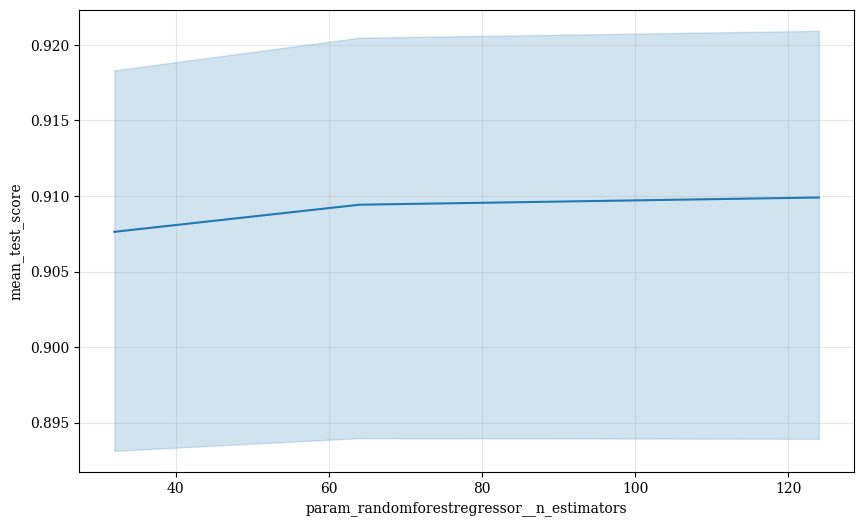

In [ ]:
var = 'squared_error'
var2 = 'sqrt'
# mse = train_data.query("param_randomforestregressor__criterion == @var and param_randomforestregressor__max_features == @var2")
mse_df = train_data.query("param_randomforestregressor__criterion == @var")

with open('tabela_treino_mse.tex', 'w') as f:
    f.write(mse_df.style.to_latex())

mse_df = mse_df.sort_values('param_randomforestregressor__n_estimators', axis = 0)

# Plot the responses for different events and regions
plt.figure()
sns.lineplot(x="param_randomforestregressor__n_estimators", y="mean_test_score",
             #hue="param_randomforestregressor__max_features", # style="event",
             data=train_data)
plt.show()

#%%

# print("Linear Regression Model")
# print("Train Score: ", linReg.score(X_train, y_train))
# print("Test Score: ", linReg.score(X_test, y_test))
# print("Validation Score: ", r2_score(y_valid, linReg.predict(X_valid)))
# print("RMSE Score: ", 100*rmse(y_train, linReg.predict(X_train)))

# print(linReg.coef_)

# sns.regplot(x = y_valid, y = linReg.predict(X_valid))
# sns.regplot(x = y_test, y = linReg.predict(X_test))
# plt.gca().axline((0,0), slope=1)
# plt.show()


#%%


Random Forest Model
Train Score:  0.989719882751301
Test Score:  0.9217060016294083
Validation Score:  0.9238591047578064


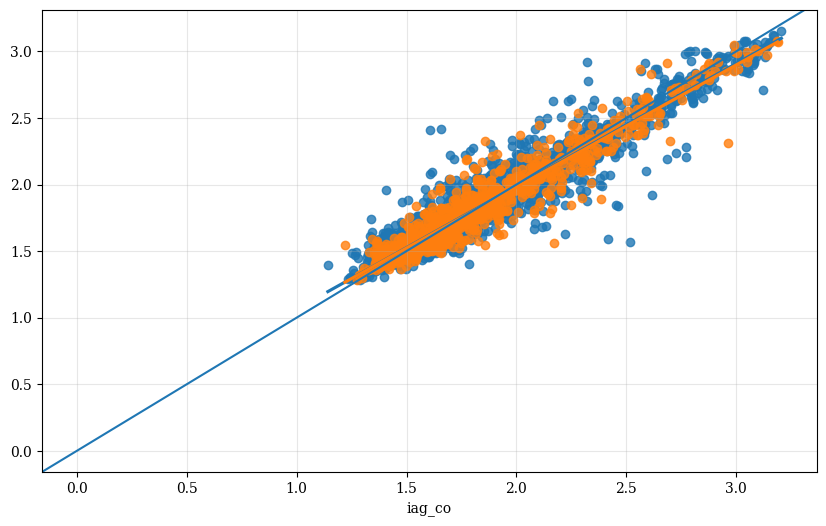

In [ ]:

print("Random Forest Model")
print("Train Score: ", gs.score(X_train, y_train))
print("Test Score: ", gs.score(X_test, y_test))
print("Validation Score: ", r2_score(y_valid, gs.predict(X_valid)))
#print("RMSE Score: ", 100*rmse(y_train, gs.predict(X_train)))

plt.figure()
sns.regplot(x = y_valid, y = gs.predict(X_valid))
sns.regplot(x = y_test, y = gs.predict(X_test))
plt.gca().axline((0,0), slope=1)

plt.show()

# #%% Antes de tudo

# e1_rf = {'co' : pd.DataFrame(data=gs.predict(Xco), index=Xco.index)}
# # e1 = {'co' : df['e2sp_co']}
# e2_ref = {'co' : df['iag_co']}

# plot_data_by_time_and_regr_plot(e1, e2, labels = ['co'], latex_labels = 'co')

# #%%
# ## ['2023-03-18 10:00:00':'2023-03-22 10:00:00'].

# e1_rf = {'co' : pd.DataFrame(data=linReg.predict(Xco), index=Xco.index)}
# # e1 = {'co' : df['e2sp_co']}
# e2_ref = {'co' : df['iag_co']}

# plot_data_by_time_and_regr_plot(e1_rf, e2_ref, labels = ['co'], latex_labels = 'co')

In [ ]:
# ========================
# [1] CARREGAR O DATASET
# ========================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from itertools import product


#Leitura da base de dados da estação grafana com os dados de CO
df_ae = pd.read_csv("co_ae.csv")
df_we = pd.read_csv("co_we.csv")
df_temp = pd.read_csv("temperatura.csv") #df da temperatura
df_bestCO = pd.read_csv('best-co.csv')
df_umidade = pd.read_csv('umidade.csv')

df_temp.columns = ['time', 'temperatura']
df_bestCO['time'] = pd.to_datetime(df_bestCO['time'], unit='ms')
df_umidade.columns = ['time', 'umidade']

# #padronizando time nas tabelas
df_bestCO['time'] = pd.to_datetime(df_bestCO['time'], unit='ms').dt.round('1s')
df_ae['time'] = pd.to_datetime(df_ae['time']).dt.round('1s')
df_we['time'] = pd.to_datetime(df_we['time']).dt.round('1s')
df_temp['time'] = pd.to_datetime(df_temp['time']).dt.round('1s')
df_umidade['time'] = pd.to_datetime(df_umidade['time'], unit='ms').dt.round('1s')

# #Limpeza das colunas de AE e WE (remover " ppb" e converter para float)
df_ae['CO_AE'] = df_ae['CO_AE'].str.replace(' ppb', '', regex=False).astype(float)
df_we['CO_WE'] = df_we['CO_WE'].str.replace(' ppb', '', regex=False).astype(float)
df_temp['temperatura'] = df_temp['temperatura'].str.replace(' °C', '', regex=False) #eliminando strings

# #Mesclagem com base na coluna 'time'
df = df_bestCO.merge(df_ae, on='time', how='inner') \
              .merge(df_we, on='time', how='inner') \
              .merge(df_temp, on='time', how='inner') \
              .merge(df_umidade, on='time', how='inner')

df = df.dropna()
dfGrafana = df.drop(columns=["time"])

#exportando para csv
dfGrafana.to_csv("grafana.csv", index=False)
dfGrafana

,CO,CO_AE,CO_WE,temperatura,umidade
0,929.284785,0.533,0.520,29.2,52.46
1,929.298999,0.531,0.520,29.2,52.45
2,929.331408,0.527,0.524,29.3,52.43
3,929.242062,0.540,0.517,29.4,52.38
4,929.162088,0.549,0.505,29.4,52.23
...,...,...,...,...,...
267582,1829.584450,0.546,0.538,23.9,69.10
267583,1829.584450,0.546,0.538,23.9,69.10
267584,1829.584450,0.546,0.538,23.9,69.10
267585,1829.584450,0.546,0.538,23.9,69.10


In [ ]:


#renomear colunas para ser compativel com o modelo treinado
dfGrafana = dfGrafana.rename(columns={'CO': 'e2sp_co','CO_AE': 'e2sp_co_ae','CO_WE': 'e2sp_co_we','temperatura': 'e2sp_temp','umidade': 'pin_umid'})
colunas_ordenadas = ['e2sp_co', 'e2sp_co_ae', 'e2sp_co_we', 'e2sp_temp', 'pin_umid']
dfGrafana = dfGrafana[colunas_ordenadas]
dfGrafana



,e2sp_co,e2sp_co_ae,e2sp_co_we,e2sp_temp,pin_umid
0,929.284785,0.533,0.520,29.2,52.46
1,929.298999,0.531,0.520,29.2,52.45
2,929.331408,0.527,0.524,29.3,52.43
3,929.242062,0.540,0.517,29.4,52.38
4,929.162088,0.549,0.505,29.4,52.23
...,...,...,...,...,...
267582,1829.584450,0.546,0.538,23.9,69.10
267583,1829.584450,0.546,0.538,23.9,69.10
267584,1829.584450,0.546,0.538,23.9,69.10
267585,1829.584450,0.546,0.538,23.9,69.10


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import pickle
import pandas as pd

#carrega arquivo
with open('modeloRF_Regressor.pickle', 'rb') as f:
    modelo = pickle.load(f)




In [ ]:
# [4] Fazer predição
y_pred = modelo.predict(dfGrafana.values)

# [5] Anexar ao DataFrame e salvar
dfGrafana["CO_previsto"] = y_pred
dfGrafana.to_csv("grafana_com_predicao.csv", index=False)
y_pred


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.23374032, 2.23374032, 2.23374032, ..., 2.26106935, 2.26106935,
       2.26106935])

In [ ]:
dfGrafana

,e2sp_co,e2sp_co_ae,e2sp_co_we,e2sp_temp,pin_umid,CO_previsto
0,929.284785,0.533,0.520,29.2,52.46,2.233740
1,929.298999,0.531,0.520,29.2,52.45,2.233740
2,929.331408,0.527,0.524,29.3,52.43,2.233740
3,929.242062,0.540,0.517,29.4,52.38,2.234702
4,929.162088,0.549,0.505,29.4,52.23,2.234702
...,...,...,...,...,...,...
267582,1829.584450,0.546,0.538,23.9,69.10,2.261069
267583,1829.584450,0.546,0.538,23.9,69.10,2.261069
267584,1829.584450,0.546,0.538,23.9,69.10,2.261069
267585,1829.584450,0.546,0.538,23.9,69.10,2.261069


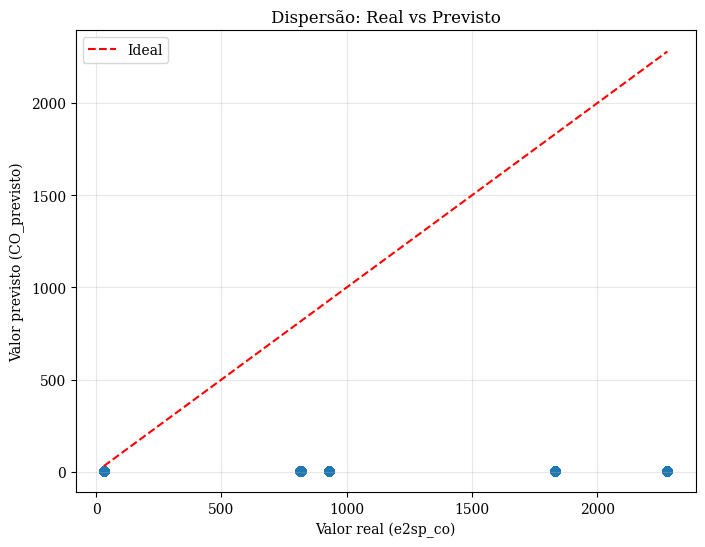

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(dfGrafana["e2sp_co"], dfGrafana["CO_previsto"], alpha=0.3)
plt.plot([dfGrafana["e2sp_co"].min(), dfGrafana["e2sp_co"].max()],
         [dfGrafana["e2sp_co"].min(), dfGrafana["e2sp_co"].max()],
         color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor real (e2sp_co)")
plt.ylabel("Valor previsto (CO_previsto)")
plt.title("Dispersão: Real vs Previsto")
plt.legend()
plt.grid(True)
plt.show()


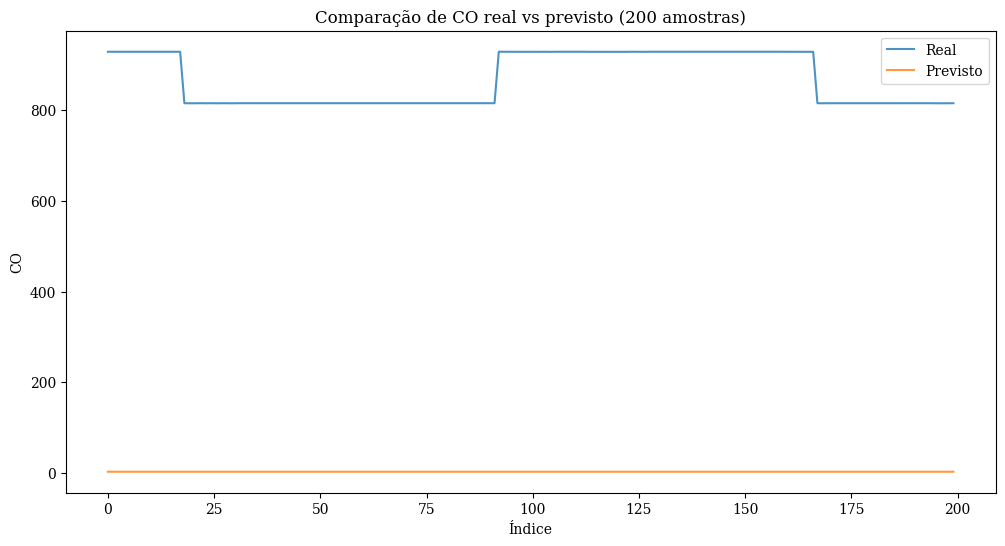

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfGrafana["e2sp_co"].values[:200], label='Real', alpha=0.8)
plt.plot(dfGrafana["CO_previsto"].values[:200], label='Previsto', alpha=0.8)
plt.legend()
plt.title("Comparação de CO real vs previsto (200 amostras)")
plt.xlabel("Índice")
plt.ylabel("CO")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = dfGrafana["e2sp_co"]
y_pred = dfGrafana["CO_previsto"]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 1729.68
MAE: 1645.29
R²: -9.5063
